# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been written. You will need to implement additional functionality to successfully answer all of the questions for this project. Unless it is requested, do not modify any of the code that has already been included. In this template code, there are four sections which you must complete to successfully produce a prediction with your model. Each section where you will write code is preceded by a **STEP X** header with comments describing what must be done. Please read the instructions carefully!

In addition to implementing code, there will be questions that you must answer that relate to the project and your implementation. Each section where you will answer a question is preceded by a **QUESTION X** header. Be sure that you have carefully read each question and provide thorough answers in the text boxes that begin with "**Answer:**". Your project submission will be evaluated based on your answers to each of the questions.  

A description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Housing), which is provided by the **UCI Machine Learning Repository**.

# Getting Started
To familiarize yourself with an iPython Notebook, **try double clicking on this cell**. You will notice that the text changes so that all the formatting is removed. This allows you to make edits to the block of text you see here. This block of text (and mostly anything that's not code) is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options! Whether you're editing a Markdown text block or a code block (like the one below), you can use the keyboard shortcut **Shift + Enter** or **Shift + Return** to execute the code or text block. In this case, it will show the formatted text.

Let's start by setting up some code we will need to get the rest of the project up and running. Use the keyboard shortcut mentioned above on the following code block to execute it. Alternatively, depending on your iPython Notebook program, you can press the **Play** button in the hotbar. You'll know the code block executes successfully if the message *"Boston Housing dataset loaded successfully!"* is printed.

In [18]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]
#which
# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()

# Initialize the housing prices and housing features
housing_prices = city_data.target
housing_features = city_data.data

print "Boston Housing dataset loaded successfully!"

Boston Housing dataset loaded successfully!


# Statistical Analysis and Data Exploration
In this first section of the project, you will quickly investigate a few basic statistics about the dataset you are working with. In addition, you'll look at the client's feature set in `CLIENT_FEATURES` and see how this particular sample relates to the features of the dataset. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand your results.

## Step 1
In the code block below, use the imported `numpy` library to calculate the requested statistics. You will need to replace each `None` you find with the appropriate `numpy` coding for the proper statistic to be printed. Be sure to execute the code block each time to test if your implementation is working successfully. The print statements will show the statistics you calculate!

In [3]:
# Number of houses in the dataset
total_houses = housing_prices.size

# Number of features in the dataset
total_features = housing_features.size

# Minimum housing value in the dataset
minimum_price = np.min(housing_prices)

# Maximum housing value in the dataset
maximum_price = np.max(housing_prices)

# Mean house value of the dataset
mean_price = np.average(housing_prices)

# Median house value of the dataset
median_price = np.median(housing_prices)

# Standard deviation of housing values of the dataset
std_dev = np.std(housing_prices)

# Show the calculated statistics
print "Boston Housing dataset statistics (in $1000's):\n"
print "Total number of houses:", total_houses
print "Total number of features:", total_features
print "Minimum house price:", minimum_price
print "Maximum house price:", maximum_price
print "Mean house price: {0:.3f}".format(mean_price)
print "Median house price:", median_price
print "Standard deviation of house price: {0:.3f}".format(std_dev)

Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 6578
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


## Question 1
As a reminder, you can view a description of the Boston Housing dataset [here](https://archive.ics.uci.edu/ml/datasets/Housing), where you can find the different features under **Attribute Information**. The `MEDV` attribute relates to the values stored in our `housing_prices` variable, so we do not consider that a feature of the data.

*Of the features available for each data point, choose three that you feel are significant and give a brief description for each of what they measure.*

Remember, you can **double click the text box below** to add your answer!

**Answer: **

To answer this question, I created graphs to analyse the parameters, they are shown in the next cell

CRIM: This is a parameter that measures the amount of crime in the town where the house is located. After analyzing the data from this feature against the price of the house, I saw there is a correlation between the price of the building and the amount of crime. In the graph, we see that the range of prices is wide when the crime is low, that could mean that there is no relation between the two paramaters, because it is possible to get a house of any price when the crime rate is low. However, the graph also shows that the range of prices narrows when the crime rate increases, it is clear that at some point in the crime rate (around 12) the price reaches a limit (28000) and tends to decrease.

RM: This is the number of rooms in the house. In this case, there is a clear correlation between the price of a house and its number of rooms; the higher number of rooms, the higher the price. 

LSTAT: This is the porcentage of the population that belongs to the lower status (pretty much related to the level of education and the incomes). Here, the correlation between this parameter and the prices of house is also clear, the price of the houses tends to decrease when the percentage of people in the lower status increases.

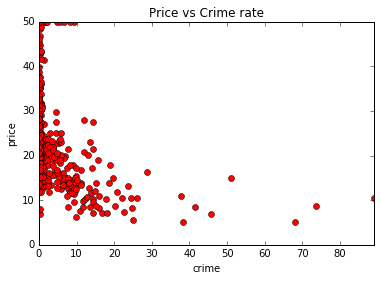

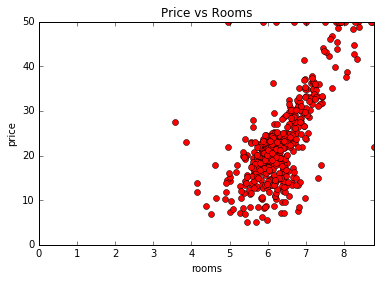

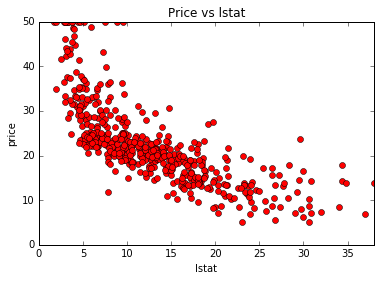

In [9]:

city_data = datasets.load_boston()

prices = city_data.target
features = city_data.data

crime = features[:,0]
rooms = features[:,5]
lstat = features[:,12]
max_price = np.max(prices)
max_crime = np.max(crime)
max_rooms = np.max(rooms)
max_lstat = np.max(lstat)

pl.plot(crime, prices, 'ro')
pl.axis([0, max_crime, 0, max_price])
pl.xlabel("crime")
pl.ylabel("price")
pl.title("Price vs Crime rate")
pl.show()

pl.plot(rooms, prices, 'ro')
pl.axis([0, max_rooms, 0, max_price])
pl.xlabel("rooms")
pl.ylabel("price")
pl.title("Price vs Rooms")
pl.show()

pl.plot(lstat, prices, 'ro')
pl.axis([0, max_lstat, 0, max_price])
pl.xlabel("lstat")
pl.ylabel("price")
pl.title("Price vs lstat")
pl.show()


## Question 2
*Using your client's feature set `CLIENT_FEATURES`, which values correspond with the features you've chosen above?*  
**Hint: ** Run the code block below to see the client's data.

In [12]:
print CLIENT_FEATURES

[[11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]]


**Answer: **

For the client, CRIM is 11.95, RM is 5.609 and LSTAT is 12.13

# Evaluating Model Performance
In this second section of the project, you will begin to develop the tools necessary for a model to make a prediction. Being able to accurately evaluate each model's performance through the use of these tools helps to greatly reinforce the confidence in your predictions.

## Step 2
In the code block below, you will need to implement code so that the `shuffle_split_data` function does the following:
- Randomly shuffle the input data `X` and target labels (housing values) `y`.
- Split the data into training and testing subsets, holding 30% of the data for testing.

If you use any functions not already acessible from the imported libraries above, remember to include your import statement below as well!   
Ensure that you have executed the code block once you are done. You'll know the `shuffle_split_data` function is working if the statement *"Successfully shuffled and split the data!"* is printed.

In [10]:
# Put any import statements you need for this code block here
import numpy as np
from sklearn import datasets

city_data = datasets.load_boston()

# Initialize the housing prices and housing features
housing_prices = city_data.target
housing_features = city_data.data

def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """

    prices2 = np.expand_dims(housing_prices, axis=1) # same number of dimensions as housing_features
    features_and_prices = np.concatenate((housing_features, prices2), axis=1) # concat feats and prices
    np.random.shuffle(features_and_prices) # shuffle
    
    size = len(features_and_prices) # prefer len() instead of .size in multidimensional arrays
    p70 = round(size * 0.7)

    training = features_and_prices[:p70] # split
    testing = features_and_prices[p70:]

    training_feats_and_prices = np.hsplit(training, np.array([13])) # split feats and prices
    testing_feats_and_prices = np.hsplit(testing, np.array([13]))

    # Shuffle and split the data
    X_train = training_feats_and_prices[0]
    y_train = np.squeeze(training_feats_and_prices[1])
    X_test = testing_feats_and_prices[0]
    y_test = np.squeeze(testing_feats_and_prices[1])

    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test


# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    print "Successfully shuffled and split the data!"
except:
    print "Something went wrong with shuffling and splitting the data."

Successfully shuffled and split the data!


/home/sebastian/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:22: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/sebastian/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:23: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


## Question 3
*Why do we split the data into training and testing subsets for our model?*

**Answer: ** We need a set of data to train and another one to validate our model. If we use all the data for training, then it's likely the model is going to be overfit to that particular data which will increase the error when using the model for other sets of information. So, we split the data to validate our model in order to avoid overfitting and reduce the error when predicting.

## Step 3
In the code block below, you will need to implement code so that the `performance_metric` function does the following:
- Perform a total error calculation between the true values of the `y` labels `y_true` and the predicted values of the `y` labels `y_predict`.

You will need to first choose an appropriate performance metric for this problem. See [the sklearn metrics documentation](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) to view a list of available metric functions. **Hint: ** Look at the question below to see a list of the metrics that were covered in the supporting course for this project.

Once you have determined which metric you will use, remember to include the necessary import statement as well!  
Ensure that you have executed the code block once you are done. You'll know the `performance_metric` function is working if the statement *"Successfully performed a metric calculation!"* is printed.

In [11]:
# Put any import statements you need for this code block here
from sklearn import metrics

def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """

    error = metrics.mean_squared_error(y_true, y_predict)
    return error


# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print "Successfully performed a metric calculation!"
except:
    print "Something went wrong with performing a metric calculation."

Successfully performed a metric calculation!


## Question 4
*Which performance metric below did you find was most appropriate for predicting housing prices and analyzing the total error. Why?*
- *Accuracy*
- *Precision*
- *Recall*
- *F1 Score*
- *Mean Squared Error (MSE)*
- *Mean Absolute Error (MAE)*

**Answer: ** In this case, we are dealing with continuos values, so none of the first four metrics are useful. We have MSE and MAE as good metrics for this particular problem. I decided to choose MSE because here we are trying to predict the price of a house; we want to minimize the error as much as possible so our client gets the best value for his house. In my opinion when dealing with money we better reduce the error because is not the same losing 50 than losing 5000 USD. So MSE emphasizes bigger errors which is useful to improve the model.

## Step 4 (Final Step)
In the code block below, you will need to implement code so that the `fit_model` function does the following:
- Create a scoring function using the same performance metric as in **Step 3**. See the [sklearn `make_scorer` documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Build a GridSearchCV object using `regressor`, `parameters`, and `scoring_function`. See the [sklearn documentation on GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

When building the scoring function and GridSearchCV object, *be sure that you read the parameters documentation thoroughly.* It is not always the case that a default parameter for a function is the appropriate setting for the problem you are working on.

Since you are using `sklearn` functions, remember to include the necessary import statements below as well!  
Ensure that you have executed the code block once you are done. You'll know the `fit_model` function is working if the statement *"Successfully fit a model to the data!"* is printed.

In [30]:
# Put any import statements you need for this code block
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics, grid_search

def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    scoring_function = metrics.make_scorer(metrics.mean_squared_error)

    # Make the GridSearchCV object
    reg = grid_search.GridSearchCV(regressor, parameters, scoring_function)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg.best_estimator_


# Test fit_model on entire dataset
try:
    reg = fit_model(housing_features, housing_prices)
    print "Successfully fit a model!"
except:
    print "Something went wrong with fitting a model."

Successfully fit a model!


## Question 5
*What is the grid search algorithm and when is it applicable?*

**Answer: **

Grid Search is an algorithm to tune hyperparameters. Hyperparameters are values used to find the best model for a given dataset, which means that the hyperparameters that yield the best model for a dataset don't necessarily yield the best model for another dataset.

In the code of Step 4, we deal with one hyperparameter, max_depth. The objective of the Grid Search algorithm is to find the value of such parameter that produces the best model for the dataset passed to the function. Every value in the sequence will be used with the regressor and the dataset. Each time, a model will be generated, but one of them will best fit the dataset.

In the example, we deal with just one parameter, however, more than one parameter can be used. In my opinion, this is the case were Grid Search is more useful, since it will generate a model for every possible combination of the given parameters.

## Question 6
*What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?*

**Answer: ** Cross-validation is a method to measure how accurate a model is, that is, how well it predicts the results in an independent dataset. The key idea of this technique is to use the provided data in a more efficient way. This is done by partitioning the dataset in chunks and use them iteratively for training and testing. For example, we can split a dataset in 10 chunks numbered from 1 to 10. In the first iteration, we use chunk 1 for testing and the rest for training, in the next iteration, we use chunk 2 for testing and the rest for training. We repeat this process 10 times. This kind of cross-validation is called k-fold.

I think Cross-validation can be helpful when using grid search to get a more accurate model, however, the drawback is that the time for computation will be higher.

# Checkpoint!
You have now successfully completed your last code implementation section. Pat yourself on the back! All of your functions written above will be executed in the remaining sections below, and questions will be asked about various results for you to analyze. To prepare the **Analysis** and **Prediction** sections, you will need to intialize the two functions below. Remember, there's no need to implement any more code, so sit back and execute the code blocks! Some code comments are provided if you find yourself interested in the functionality.

In [13]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print "Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . ."
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.rint(np.linspace(1, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

In [2]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

# Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing error rates on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `max_depth` parameter on the full training set to observe how model complexity affects learning and testing errors. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


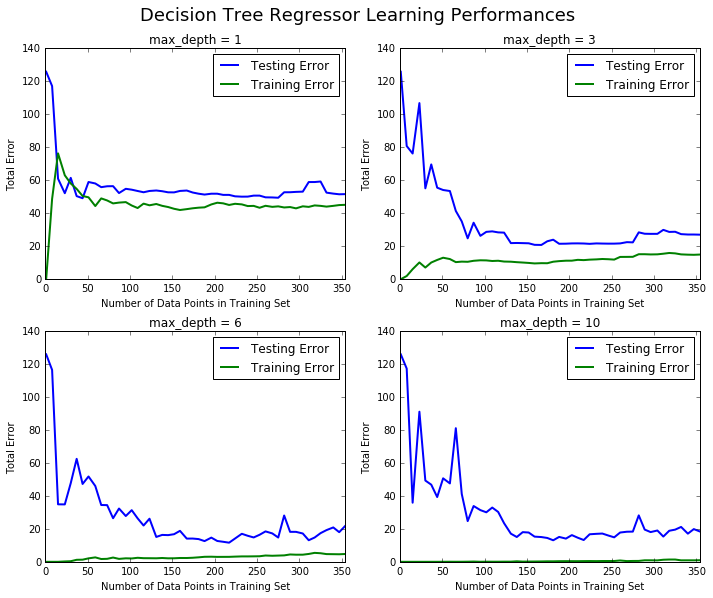

In [20]:
learning_curves(X_train, y_train, X_test, y_test)

## Question 7
*Choose one of the learning curve graphs that are created above. What is the max depth for the chosen model? As the size of the training set increases, what happens to the training error? What happens to the testing error?*

**Answer: **
max_depth = 3. When the training set increases, the training error starts with a low value, but then it increases and reaches a plateau. The testing error starts with a high value and decreases, it also reaches a plateau. Both errors tend to converge. From this graph, we can say that the model has a good performance (it predicts better) compared to the one with max_depth = 1, because in that graph, even though the error converge, their values are too high.

## Question 8
*Look at the learning curve graphs for the model with a max depth of 1 and a max depth of 10. When the model is using the full training set, does it suffer from high bias or high variance when the max depth is 1? What about when the max depth is 10?*

**Answer: **
In the case of max_depth = 1, the model has high bias because even though the errors converge, their values are too high. This means that the model is too simple, we are in a situation of under-fitting. To correct this, we need to add new features to the model, that is, make the model more complex.

In the case of max depth = 10, the model has high variance because the gap between the training error and the testing error is big, meaning that the model behaves well in the training stage, but fails in the testing one. We face a over-fitting situation. To correct this, we can use more data in the training stage or make the model less complex.

Creating a model complexity graph. . . 


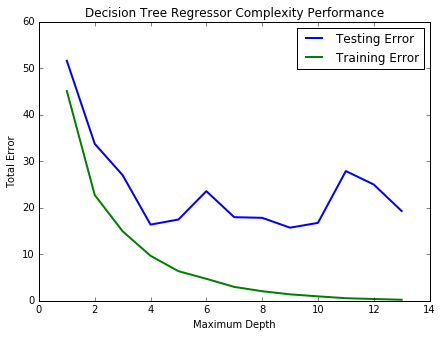

In [21]:
model_complexity(X_train, y_train, X_test, y_test)

## Question 9
*From the model complexity graph above, describe the training and testing errors as the max depth increases. Based on your interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?*

**Answer: ** 

When the max depth increases, we see that the training error decreases. In the other hand, the testing error decreases until some point, where it starts to increase. 

Based on this we can say that the training error is decreasing because the model is getting more complex (using more features) which fits correctly the dataset. So, the more complex the model the lower the training error. In the case of the testing error, there is a point where the decreasing tendency stops, and it starts to increase. From this point the model becomes too complex (it's over-fitting), it does not behaves well with new data.

The point where the model best generalizes the dataset is at max_depth = 4. This is the point where the testing error has its minimum value. At max_depth = 9, the testing error also reaches its minimum value, but the difference with the training error (the gap between them) is bigger.



# Model Prediction
In this final section of the project, you will make a prediction on the client's feature set using an optimized model from `fit_model`. When applying grid search along with cross-validation to optimize your model, it would typically be performed and validated on a training set and subsequently evaluated on a **dedicated test set**. In this project, the optimization below is performed on the *entire dataset* (as opposed to the training set you made above) due to the many outliers in the data. Using the entire dataset for training provides for a less volatile prediction at the expense of not testing your model's performance. 

*To answer the following questions, it is recommended that you run the code blocks several times and use the median or mean value of the results.*

## Question 10
*Using grid search on the entire dataset, what is the optimal `max_depth` parameter for your model? How does this result compare to your intial intuition?*  
**Hint: ** Run the code block below to see the max depth produced by your optimized model.

In [31]:
print "Final model has an optimal max_depth parameter of", reg.get_params()['max_depth']

Final model has an optimal max_depth parameter of 1


**Answer: ** The optima max_depth is 1. I think this value is good since, as far as I was able to check, there is a linear regression between the price and several features, the number of rooms, for instance.

## Question 11
*With your parameter-tuned model, what is the best selling price for your client's home? How does this selling price compare to the basic statistics you calculated on the dataset?*  

**Hint: ** Run the code block below to have your parameter-tuned model make a prediction on the client's home.

In [29]:
sale_price = reg.predict(CLIENT_FEATURES)
print "Predicted value of client's home: {0:.3f}".format(sale_price[0])

Predicted value of client's home: 19.934


**Answer: **

The predicted value is 19.934. This value is close to the median (21.200) and mean (22.533). In this case, we see that the mean and median are close to each other, which tell us that we don't have outliers that can pull the mean to their side.

## Question 12 (Final Question):
*In a few sentences, discuss whether you would use this model or not to predict the selling price of future clients' homes in the Greater Boston area.*

**Answer: **

I will use this model to predict the selling price of other houses. The mean reason for that is that we have a linear regression, so the model we use is not too complex and gives good results. I think the mode is good enough to predict the prices. If we see the features choosen in question 1 (CRIM, DR, LSTAT), the values from the dataset and the values of the client's features, it is clear that the prediction of the price is quite good.